 Assignment 01  -- 王昕钰

助教老师好,前面都是复现的老师作业要求中的code。作业部分前我空白了三行，下拉看到空白行往下看就是我本次的作业了。谢谢您～


### Part One 

#### Map Research -BFS

In [1]:
Beijing, Changchun, Mulumuqi, Wuhan, Guangzhou, Shenzhen, Bangkok, Shanghai, Newyork="""
Beijing Changchun Mulumuqi Wuhan Guangzhou Shenzhen Bangkok Shanghai Newyork""".split()

In [2]:
connection={
    Changchun:[Beijing],
    Mulumuqi:[Beijing],
    Beijing:[Mulumuqi,Changchun,Wuhan,Shenzhen,Newyork],
    Newyork:[Beijing, Shanghai],
    Shanghai:[Newyork,Wuhan],
    Wuhan:[Shanghai,Beijing,Guangzhou],
    Guangzhou:[Wuhan,Bangkok],
    Shenzhen:[Wuhan,Bangkok],
    Bangkok:[Shenzhen, Guangzhou]
}

In [3]:
import networkx as nx

In [4]:
%matplotlib inline

In [5]:
g=nx.Graph(connection)

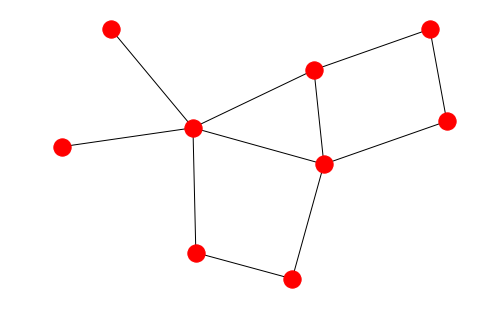

In [6]:
nx.draw(g)

In [7]:
def navigator(start,destination,connection_graph):
    pathes=[[start]] #pathes store all routes we try
    seen=set() #If one point has been checked before, we will not check it again
    
    while pathes:
        path=pathes.pop(0) #Checking for the first route from the pathes
        frontier=path[-1] #Checking the last point of this path
        
        if frontier in seen: continue
            
        successors=connection_graph[frontier]
        
        for s in successors:
            if s ==destination:
                path.append(s)
                return path
            else:
                pathes.append(path+[s])
                
        pathes=sorted(pathes, key=len) #Make sure that the number of travel is the smallest
        
        seen.add(frontier)

In [8]:
navigator(Beijing, Newyork, g)

['Beijing', 'Newyork']

In [9]:
def navigator_bfs(start, destination, connection_graph):
    pathes=[start]
    seen=set()
    
    while pathes:
        frontier = pathes.pop(0)
        if frontier in seen:continue
            
        successors=connection_graph[frontier]
        print('Standing on{} Looking forward {}'.format(frontier,successors))
        pathes= pathes+ successors
        
        seen.add(frontier)

In [10]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

In [11]:
pic=nx.Graph(connection_2)

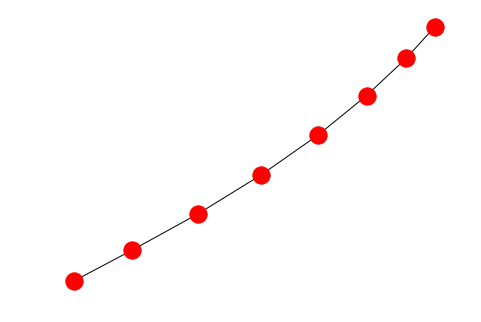

In [12]:
nx.draw(pic)

In [13]:
navigator_bfs(1,5,connection_2)

Standing on1 Looking forward [0, 2]
Standing on0 Looking forward [1, 5]
Standing on2 Looking forward [1, 3]
Standing on5 Looking forward [0, 6]
Standing on3 Looking forward [2, 4]
Standing on6 Looking forward [5, 7]
Standing on4 Looking forward [3]
Standing on7 Looking forward [6]


#### Sentence Generation

In [14]:
sentence_grm = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [15]:
import random

In [16]:
def parse_grammar(grammar_str,sep='=>'):
    grammar={}
    for line in grammar_str.split('\n'):
        line=line.strip()
        if not line: continue
            
        target,rules=line.split(sep)
        grammar[target.strip()]=[r.split() for r in rules.split('|')]
    return grammar

In [17]:
#a='  verb_phrase => verb noun_phrase'.strip()
#a

In [18]:
grm=parse_grammar(sentence_grm)
grm

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [19]:
def generator(grammar_parsed,target='sentence'):
    if target not in grammar_parsed: return target
    rule=random.choice(grammar_parsed[target])
    return ''.join(generator(grammar_parsed,target=r) for r in rule if r!='null')

In [20]:
generator(grm)

'这个女人听着这个好看的桌子'

### Homework
#### Pattern Match


In [21]:
def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

In [22]:
def pat_match(pattern,saying):
    if not pattern or not saying:
        return []
    if is_variable(pattern[0]):
        return [(pattern[0],saying[0])]+pat_match(pattern[1:],saying[1:])
    else:
        if pattern[0]!=saying[0]:
            return []
        else:
            return pat_match(pattern[1:],saying[1:])

In [23]:
def pat_to_dict(patterns):
    return {k:v for k,v in patterns}

In [24]:
def substitute(rule,dictionary):
    if not rule:return []
    
    return [dictionary.get(rule[0],rule[0])]+substitute(rule[1:],dictionary)

In [25]:
defined_patterns = {
    "I need ?X": ["Image you will get ?X soon", "Why do you need ?X ?"], 
    "My ?X told me something": ["Talk about more about your ?X", "How do you think about your ?X ?"]
}

In [26]:
import random

In [27]:
def get_response(saying, rules):
    for key in rules.keys():
        match=pat_match(key.split(),saying.split()) 
        #Checking whether this sentence match one of the patterns we defined
        if match:           
            dic=pat_to_dict(match)
            words=substitute(random.sample(rules[key],1)[0].split(),dic)
            sentence=' '.join(words)
            return sentence
            

In [28]:
#Test 1
get_response("My mother told me something",defined_patterns)

'How do you think about your mother ?'

In [29]:
#Test 2
get_response('I need iPhone',defined_patterns) 

'Why do you need iPhone ?'

#### Segment Match

In [30]:
def is_pattern_segment(pattern):
    return pattern.startswith('?*') and all(a.isalpha() for a in pattern[2:])

In [31]:
from collections import defaultdict

In [32]:
def segment_match(pattern, saying):
    seg_pat, rest = pattern[0], pattern[1:]
    seg_pat = seg_pat.replace('?*', '?')

    if not rest: return (seg_pat, saying), len(saying)    
    
    for i, token in enumerate(saying):
        if rest[0] == token and is_match(rest[1:], saying[(i + 1):]):
            return (seg_pat, saying[:i]), i
    
    return (seg_pat, saying), len(saying)

def is_match(rest, saying):
    if not rest and not saying:
        return True
    if not all(a.isalpha() for a in rest[0]):
        return True
    if rest[0] != saying[0]:
        return False
    return is_match(rest[1:], saying[1:])

In [33]:
fail = [True, None]

def pat_match_with_seg(pattern, saying):
    if not pattern or not saying: return []
    
    pat = pattern[0]
    
    if is_variable(pat):
        return [(pat, saying[0])] + pat_match_with_seg(pattern[1:], saying[1:])
    elif is_pattern_segment(pat):
        match, index = segment_match(pattern, saying)
        return [match] + pat_match_with_seg(pattern[1:], saying[index:])
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:], saying[1:])
    else:
        return fail

In [34]:
def segment_match(pattern,saying):
    seg_pat, rest=pattern[0],pattern[1:]
    seg_pat=seg_pat.replace('?*','?')
    
    if not rest:return (seg_pat,saying), len(saying)
    
    for i,token in enumerate(saying):
        if rest[0]==token:
            return (seg_pat,saying[:i]),i
    return (seg_pat,saying), len(saying)

In [35]:
segment_match('?*P is very good'.split(), "My dog and my cat is very good".split())

(('?P', ['My', 'dog', 'and', 'my', 'cat']), 5)

In [36]:
pat_match_with_seg('?*P is very good'.split(), "My dog and my cat is very good".split())

[('?P', ['My', 'dog', 'and', 'my', 'cat'])]

In [37]:
response_pair = {
    'I need ?X': [
        "Why do you need ?X"
    ],
    "I dont like my ?X": ["What bad things did ?X do for you?"]
}

In [38]:
#The pat_to_dic() function we used before has some problem
pat_to_dict(pat_match_with_seg('?*P is very good'.split(), "My dog and my cat is very good".split()))
#We can see that the value of the dictionary might be a list

{'?P': ['My', 'dog', 'and', 'my', 'cat']}

In [39]:
#Modifying the pat_to_dict() function
def pat_to_dict(patterns):
    #This function is helping us return a dictionary of which element should be substitute
    return {k:' '.join(v) if isinstance(v,list) else v for k, v in patterns}

In [40]:
###Step one- Using the pat_match_with_seg() function to check for matches words
words_list=pat_match_with_seg('I need ?*X'.split(), "I need an iPhone".split())
words_list

[('?X', ['an', 'iPhone'])]

In [41]:
###Step two- Using the pat_to_dict() function to help us make a dictionary showing this relationship
dic=pat_to_dict(words_list)
dic

{'?X': 'an iPhone'}

In [42]:
###Step three- Using the substitute() funtion to help us substitute words with special charactors of the answers
pre_sen=substitute("Why do you need ?X".split(),dic)

In [43]:
###Step four- Making a sentence
' '.join(pre_sen)

'Why do you need an iPhone'

 Answer of this project

Problem 1:编写一个程序, get_response(saying, response_rules)输入是一个字符串 + 我们定义的 rules，例如上边我们所写的 pattern， 输出是一个回答。

In [44]:
rules = {
    "?*X hello ?*Y": ["Hi, how do you do?"],
    "I was ?*X": ["Were you really ?X ?", "I already knew you were ?X ."]
}

In [45]:
def get_response(saying, response_rules):
    for key in response_rules.keys():
        word_list=pat_match_with_seg(key.split(),saying.split())
        #Checking whether this sentence match one of the patterns we defined
        if len(word_list[0][1])!=len(saying.split()):
        #Make sure that other rules not starting with '?*X' can also be used 
            if word_list:           
                dic=pat_to_dict(word_list)
                words=substitute(random.sample(response_rules[key],1)[0].split(),dic)
                sentence=' '.join(words)
                return sentence

In [46]:
#Test 1
get_response('I was Siri',rules)

'I already knew you were Siri .'

In [47]:
#Test 2
get_response('lala hello',rules)

'Hi, how do you do?'

Problem 2:改写以上程序，将程序变成能够支持中文输入的模式。 提示: 你可以需用用到 jieba 分词

In [48]:
rule_responses = {
    '?*x hello ?*y': ['How do you do', 'Please state your problem'],
    '?*x I want ?*y': ['what would it mean if you got ?y', 'Why do you want ?y', 'Suppose you got ?y soon'],
    '?*x if ?*y': ['Do you really think its likely that ?y', 'Do you wish that ?y', 'What do you think about ?y', 'Really-- if ?y'],
    '?*x no ?*y': ['why not?', 'You are being a negative', 'Are you saying \'No\' just to be negative?'],
    '?*x I was ?*y': ['Were you really', 'Perhaps I already knew you were ?y', 'Why do you tell me you were ?y now?'],
    '?*x I feel ?*y': ['Do you often feel ?y ?', 'What other feelings do you have?'],
    '?*x你好?*y': ['你好呀', '请告诉我你的问题'],
    '?*x我想?*y': ['你觉得?y有什么意义呢？', '为什么你想?y', '你可以想想你很快就可以?y了'],
    '?*x我想要?*y': ['?x想问你，你觉得?y有什么意义呢?', '为什么你想?y', '?x觉得... 你可以想想你很快就可以有?y了', '你看?x像?y不', '我看你就像?y'],
    '?*x喜欢?*y': ['喜欢?y的哪里？', '?y有什么好的呢？', '你想要?y吗？'],
    '?*x讨厌?*y': ['?y怎么会那么讨厌呢?', '讨厌?y的哪里？', '?y有什么不好呢？', '你不想要?y吗？'],
    '?*xAI?*y': ['你为什么要提AI的事情？', '你为什么觉得AI要解决你的问题？'],
    '?*x机器人?*y': ['你为什么要提机器人的事情？', '你为什么觉得机器人要解决你的问题？'],
    '?*x对不起?*y': ['不用道歉', '你为什么觉得你需要道歉呢?'],
    '?*x我记得?*y': ['你经常会想起这个吗？', '除了?y你还会想起什么吗？', '你为什么和我提起?y'],
    '?*x如果?*y': ['你真的觉得?y会发生吗？', '你希望?y吗?', '真的吗？如果?y的话', '关于?y你怎么想？'],
    '?*x我?*z梦见?*y':['真的吗? --- ?y', '你在醒着的时候，以前想象过?y吗？', '你以前梦见过?y吗'],
    '?*x妈妈?*y': ['你家里除了?y还有谁?', '嗯嗯，多说一点和你家里有关系的', '她对你影响很大吗？'],
    '?*x爸爸?*y': ['你家里除了?y还有谁?', '嗯嗯，多说一点和你家里有关系的', '他对你影响很大吗？', '每当你想起你爸爸的时候， 你还会想起其他的吗?'],
    '?*x我愿意?*y': ['我可以帮你?y吗？', '你可以解释一下，为什么想?y'],
    '?*x我很难过，因为?*y': ['我听到你这么说， 也很难过', '?y不应该让你这么难过的'],
    '?*x难过?*y': ['我听到你这么说， 也很难过',
                 '不应该让你这么难过的，你觉得你拥有什么，就会不难过?',
                 '你觉得事情变成什么样，你就不难过了?'],
    '?*x就像?*y': ['你觉得?x和?y有什么相似性？', '?x和?y真的有关系吗？', '怎么说？'],
    '?*x和?*y都?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    '?*x和?*y一样?*z': ['你觉得?z有什么问题吗?', '?z会对你有什么影响呢?'],
    '?*x我是?*y': ['真的吗？', '?x想告诉你，或许我早就知道你是?y', '你为什么现在才告诉我你是?y'],
    '?*x我是?*y吗': ['如果你是?y会怎么样呢？', '你觉得你是?y吗', '如果你是?y，那一位着什么?'],
    '?*x你是?*y吗':  ['你为什么会对我是不是?y感兴趣?', '那你希望我是?y吗', '你要是喜欢， 我就会是?y'],
    '?*x你是?*y' : ['为什么你觉得我是?y'],
    '?*x因为?*y' : ['?y是真正的原因吗？', '你觉得会有其他原因吗?'],
    '?*x我不能?*y': ['你或许现在就能?*y', '如果你能?*y,会怎样呢？'],
    '?*x我觉得?*y': ['你经常这样感觉吗？', '除了到这个，你还有什么其他的感觉吗？'],
    '?*x我?*y你?*z': ['其实很有可能我们互相?y'],
    '?*x你为什么不?*y': ['你自己为什么不?y', '你觉得我不会?y', '等我心情好了，我就?y'],
    '?*x好的?*y': ['好的', '你是一个很正能量的人'],
    '?*x嗯嗯?*y': ['好的', '你是一个很正能量的人'],
    '?*x不嘛?*y': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    '?*x不要?*y': ['为什么不？', '你有一点负能量', '你说 不，是想表达不想的意思吗？'],
    '?*x有些人?*y': ['具体是哪些人呢?'],
    '?*x有的人?*y': ['具体是哪些人呢?'],
    '?*x某些人?*y': ['具体是哪些人呢?'],
    '?*x每个人?*y': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    '?*x所有人?*y': ['我确定不是人人都是', '你能想到一点特殊情况吗？', '例如谁？', '你看到的其实只是一小部分人'],
    '?*x总是?*y': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    '?*x一直?*y': ['你能想到一些其他情况吗?', '例如什么时候?', '你具体是说哪一次？', '真的---总是吗？'],
    '?*x或许?*y': ['你看起来不太确定'],
    '?*x可能?*y': ['你看起来不太确定'],
    '?*x他们是?*y吗？': ['你觉得他们可能不是?y？'],
    '?*x': ['很有趣', '请继续', '我不太确定我很理解你说的, 能稍微详细解释一下吗?']
}

In [49]:
import jieba

In [50]:
#Define a function helping us checking whether Chinese characters exist in our input sentence
def is_contain_chinese(check_str):

    for ch in check_str:
        if u'\u4e00' <= ch <= u'\u9fff':
            return True
    return False


In [51]:
print (is_contain_chinese('小王'))
print (is_contain_chinese('judy'))

True
False


In [52]:
##重点应该是将中文对应的 改造成已经写过的格式
#如定义一个 change_pattern() function

In [53]:
def change_pattern(pattern):
    a=''.join(jieba.cut(pattern))
    output=[]
    inner=[]
    flag=is_contain_chinese(a[0])
    for char in a:
        if is_contain_chinese(char)==flag:
            inner.append(char)
        else:
            output.append(inner)
            inner=[char]
            flag=is_contain_chinese(char)
    output.append(inner)
    changes=[''.join(i) for i in output]
    return changes

In [54]:
from icecream import ic

In [55]:
#定义一个函数帮助我们判断回复语句中是否含有替代的关键词 如?*y 等
def has_speical_char(value):
    for element in value:
        return ('?x' in element) or ('?y' in element)


In [56]:
has_speical_char(['好的', '你是一个很正能量的人'])

False

In [57]:
has_speical_char(['你觉得他们可能不是?y？'])

True

In [99]:
def get_response(saying, response_rules):
    if not is_contain_chinese(saying):
        for key in response_rules.keys():
            word_list=pat_match_with_seg(key.split(),saying.split())
        #Checking whether this sentence match one of the patterns we defined
            if len(word_list[0][1])==len(saying.split()): continue
        #Make sure that other rules not starting with '?*X' can also be used 
            else:
                if word_list:           
                    dic=pat_to_dict(word_list)
                    words=substitute(random.sample(response_rules[key],1)[0].split(),dic)
                    sentence=' '.join(words)
                    return sentence
    else:
        for key in response_rules.keys():
            word_list=pat_match_with_seg(change_pattern(key),' '.join(jieba.cut(saying)).split())
            if word_list == fail: continue
            string=word_list[0][1]
            if len(''.join(string)) != (len(saying)):
                if word_list:
                    dic=pat_to_dict(word_list)
                    if has_speical_char(response_rules[key]):
                        words=substitute(change_pattern(response_rules[key][0]),dic)
                        sentence=''.join(words)
                    else:
                        words=substitute(random.sample(response_rules[key],1)[0],dic)
                        sentence=words[0]
                    return sentence



In [106]:
#Test 1 检查设置回复中不含有特殊字符的
get_response('喜欢机器人',rule_responses)

'喜欢机器人的哪里？'

In [100]:
#Test 2 检查设置回复中含有特殊字符的
get_response('喜欢苹果',rule_responses)

'喜欢苹果的哪里？'

In [103]:
#Test 3 检查设置回复中含特殊字符串的
get_response('天冷因为降温',rule_responses)

'降温是真正的原因吗？'

Problem 3:多设计一些模式，让这个程序变得更好玩，多和大家交流，看看大家有什么好玩的模式

In [107]:
new_rules = {'?*x报错?*y':['bug使你成长','你要买个小黄鸭吗'],
            '今天?*y':['?y是个好日子','?y你吃披萨了吗']
            }

In [108]:
random.sample(new_rules['?*x报错?*y'],1)[0]

'bug使你成长'

In [110]:
get_response('今天阴天',new_rules)

'阴天是个好日子'

Problem 4:

1.这样的程序有什么优点？有什么缺点？你有什么可以改进的方法吗？

跑这个程序的时候感觉优点是只要pattern设置的多样，能够省去很多人工，如淘宝客服。缺点是:(1)如果在字符分割的时候划分的不够好，就会导致我们的程序无法识别，如使用jieba.cut()时。我能想到的改进方法是通过多可能可能的划分和输入语句，尽可能多的设置pattern来提高识别的准确率。(2)对于pattern的设定有严格的要求，如果设定不当就会返回不合适的值（亲测）

2.什么是数据驱动？数据驱动在这个程序里如何体现？


数据驱动是当我们写程序时尽可能使之适用于更多的数据类型，而不是每一个数据定义一套程序。
在本程序中当我们从第一问转至第二问时，要多考虑到中文的输入，比起重新定义所有的函数，通过将中文语句拆分组合并转化成和第一问中相同的输入格式，让我们可以沿用第一问中的大多数函数。

3.数据驱动与 AI 的关系是什么？

做数据驱动型的AI?
